# ハイパーパラメータとチューニング
- 機械学習モデルの中で、使い手が調整する必要があるパラメータ。
- モデルごとに用意されているもので、それぞれ確認する必要がある。
- 注：本とversionが異なったため、異なった変数で対応している可能性があり。使う際は要確認。

## ロジスティック回帰のハイパーパラメータ
- logisticregnissionのパラメータにはCという値がある。
- Cは分類間違いの精度に直結する値で、Cの値を小さくすることで分類誤りに寛容になる。
- Cの値を極端に多くすれば今度は過学習になるため、その値を探る必要がある。

In [20]:
from sklearn.datasets import make_classification as mcf
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib .pyplot as plt
%matplotlib inline


X, y = mcf(n_samples=1250, n_features=4, n_redundant=2,random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

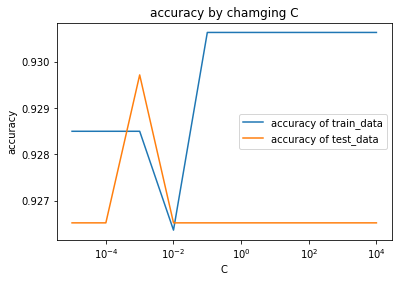

In [18]:
C_list = [10 ** i for i in range(-5, 5)]

train_accuracy = []
test_accuracy = []

for C in C_list:
    model = LR(solver="liblinear",C=C, random_state=42)
    model.fit(train_X, train_y)
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))
    
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by chamging C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### random_satetとpenaltyとmulti_class
- random_stateは指定することで、ランダム性を保存することができ、再現性を可能とする。
- penaltyはモデルの複雑さに対するもの。基本的にL1を指定。L2はデータ全体のウェイトを調整し一般化できる。
- multi_classはモデルの動作を決定づけるもの。ovrは極端に二値を繰り出すのに対し、multinomialは二値の属する可能性を言及するのに適している。

## 線形SVMのパラメータ
- パラメータCを同様にもち、同様の許容度を示す。

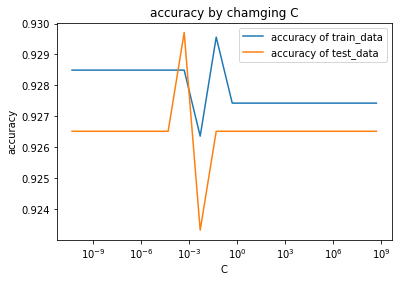

In [20]:
from sklearn.datasets import make_classification as mcf
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

X, y =mcf(n_samples=1250, n_features=4,
         n_redundant=2, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)


C_list = [10 ** i/2 for i in range(-10, 10)]

train_accuracy = []
test_accuracy = []

for C in C_list:
    model = LinearSVC(C=C,dual=False)
    model.fit(train_X, train_y)
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by chamging C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### ※注：線形SVMの他のパラメータ
- multi_classは基本的に二値分類では設定する必要はない
- random_stateは設定した値によっても、結果が異なる場合がある。

## 非線形SVMのパラメータ
- 非線形SVMのC値のことをソフトマージンのペナルティと呼ぶ（らしい）
- 同様に許容度を示す指標

Using matplotlib backend: Qt5Agg


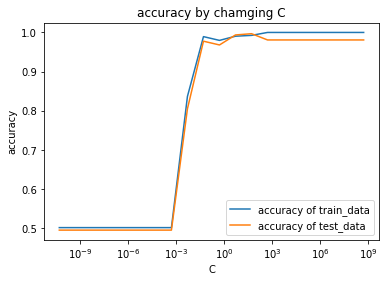

In [22]:
import matplotlib
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles as mgq
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib

X, y = mgq(n_samples=1250, n_classes=2,\
                  n_features=2,random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)


C_list = [10 ** i/2 for i in range(-10, 10)]

train_accuracy = []
test_accuracy = []

for C in C_list:
    model = SVC(C=C, gamma="scale", random_state=42)
    model.fit(train_X, train_y)
    
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))

plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by chamging C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### random_stateについて
- 実際の機械学習では乱数生成のための生成器の指定をしなければいけない。
- 指定にはnp.random.Randomsate()を用いる

In [25]:
import matplotlib
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles as mgq
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
%matplotlib

X, y = mgq(n_samples=1250, n_classes=2,\
                  n_features=2,random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)

random_state = np.random.RandomState()

model = SVC(C=C, gamma="scale", random_state=random_state)
model.fit(train_X, train_y)
print(model.score(test_X, test_y))

Using matplotlib backend: Qt5Agg
0.9808306709265175


### kernelについて
- データを分類しやすくするために捜査して整理する機能を受け持つ。
- 非線形SVMにおいては非常に大事なパラメータ。
- linearは線形SVCと変わらない機能。
- rbfがデフォルトで、基本的に正解率が高い。
- polyは立体投影にちかいもの。
- precomputedは整理済みデータに用いる。
- sigmoidはロジスティック回帰と同じ処理。

In [3]:
import matplotlib
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles as mgq
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
%matplotlib

X, y = mgq(n_samples=1250, n_classes=2,\
                  n_features=2,random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)

random_state = np.random.RandomState()

for a in ["linear", "rbf", "poly", "sigmoid"]:
    model = SVC(gamma="scale", random_state=random_state, kernel=a)
    model.fit(train_X, train_y)
    print(a)
    print(model.score(test_X, test_y))
    print()

Using matplotlib backend: Qt5Agg
linear
0.65814696485623

rbf
0.9744408945686901

poly
0.5463258785942492

sigmoid
0.4984025559105431



## 決定木のパラメータ
- max_depthについて。
- 学習時にモデルが学習する木の深さを設定する。
- 枝分かれ先を増やしすぎるとデータの特徴がつぶれる。

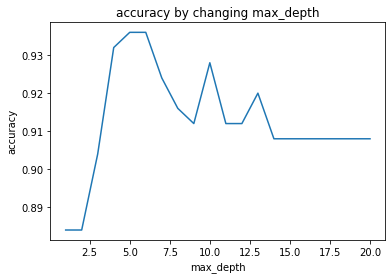

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mcf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
%matplotlib inline

X, y =mcf(n_samples=1000, n_features=4,
         n_redundant=2, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)

depth_list = [i for i in range(1,21)]

accuracy = []

for depth in depth_list:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))
    
plt.plot(depth_list, accuracy)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("accuracy by changing max_depth")
plt.show()

## ランダムフォレストパラメータ
- ランダムフォレストは決定木の簡易的なものを複数生成するため、それを制御する二つの要素が存在する。
### n_estimators
- 簡易決定木の個数を決めるパラメータ
### max_depth
- 決定木の枝分かれの数だが、簡易とつけてるため数は控えめに設定する（過学習につながる）。

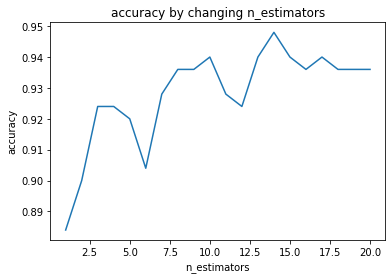

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mcf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import preprocessing
%matplotlib inline

X, y =mcf(n_samples=1000, n_features=4,
         n_redundant=2, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)

n_estimators_list  = [i for i in range(1,21)]

accuracy = []

for n_estimators in n_estimators_list:
    model = RF(n_estimators=n_estimators)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(n_estimators_list, accuracy)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title("accuracy by changing n_estimators")
plt.show()

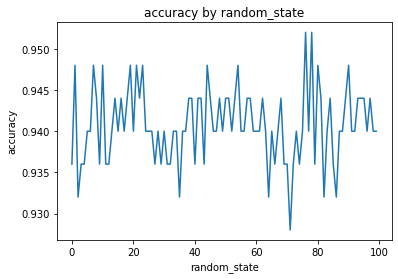

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mcf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import preprocessing
%matplotlib inline

X, y =mcf(n_samples=1000, n_features=4,
         n_redundant=2, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)

r_seed  = [i for i in range(100)]

accuracy = []

for r in r_seed:
    model = RF(n_estimators=100, random_state=r)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(r_seed, accuracy)
plt.xlabel("random_state")
plt.ylabel("accuracy")
plt.title("accuracy by random_state")
plt.show()

## k-NNのハイパーパラメータ
- k-NN法の説明にあったように、k個のデータ抽出の数値変化を確認してみる。
- 使う変数はn_neighbors。

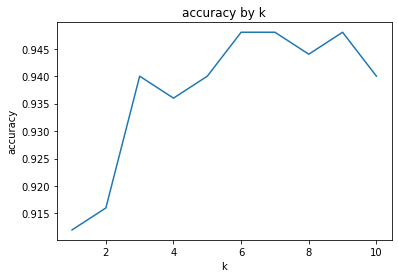

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mcf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn import preprocessing
%matplotlib inline

X, y =mcf(n_samples=1000, n_features=4,
         n_redundant=2, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state=42)
k_list  = [i for i in range(1, 11)]

accuracy = []

for k in k_list:
    model = KN(n_neighbors=k)
    model.fit(train_X, train_y)
    accuracy.append(model.score(test_X, test_y))

plt.plot(k_list, accuracy)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("accuracy by k")
plt.show()